Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

Load dataset

In [22]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


statistical anaylysis of dataset

In [24]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


size of data set and information on dataset 

In [25]:
df.shape

(150, 6)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


drop nan values

In [6]:
df=df.dropna(axis=0)
df.shape

(150, 6)

columns present in dataset

In [27]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Perform labelencoding

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [29]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [30]:
x = df.drop(['Species'],axis=1)
y=df['Species']

data visualization

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

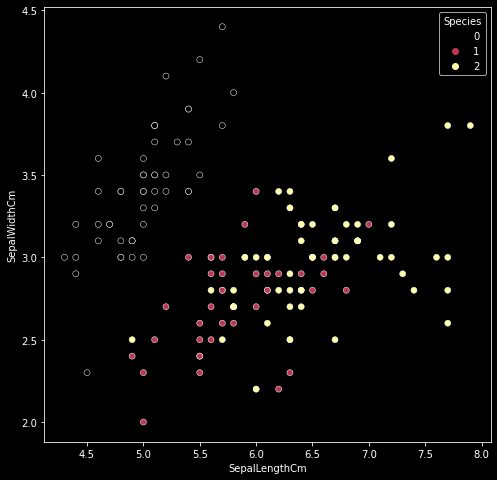

In [31]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',palette='inferno',data=df)

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

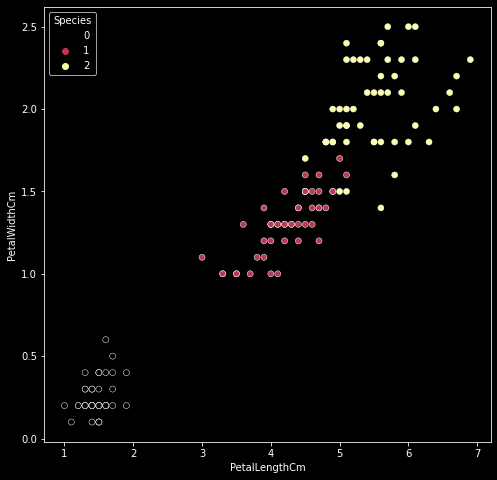

In [32]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',palette='inferno',data=df)

<AxesSubplot:>

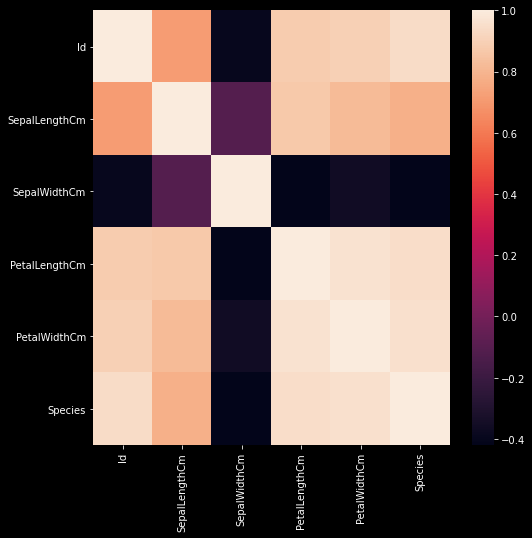

In [33]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr())

Perform train test split

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

classification using decision tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
dt.fit(x_train,y_train)
predictions = dt.predict(x_test)
predictions1 = dt.predict(x_train)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('testing accuracy',accuracy_score(y_test, predictions))
print('training accuracy',accuracy_score(y_train, predictions1))

[[11  0  0]
 [ 0 12  0]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

testing accuracy 1.0
training accuracy 1.0


plot graph for decision tree

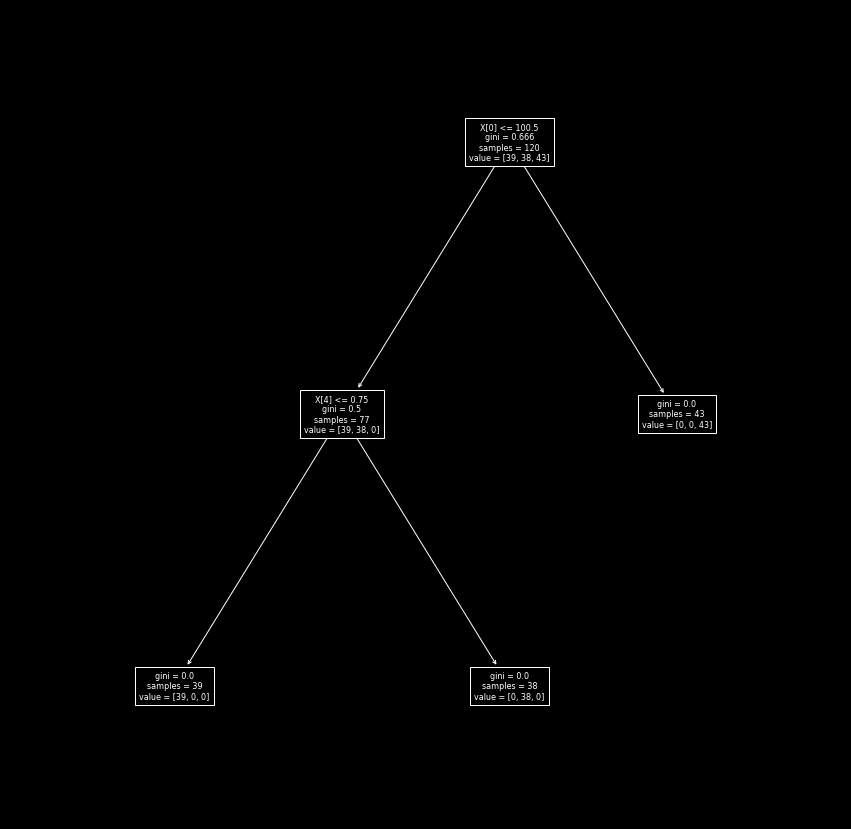

In [37]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(15,15))
tree.plot_tree(dt,fontsize=8)
plt.show()

Perform logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
predictions = lr.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('testing accuracy',accuracy_score(y_test, predictions))
print('training accuracy',accuracy_score(y_train, predictions1))

[[11  0  0]
 [ 0 12  0]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

testing accuracy 1.0
training accuracy 1.0


C:\Users\ruturaj javeri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
